In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/monthly_milk_production.csv")
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        168 non-null    datetime64[ns]
 1   Production  168 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [5]:
df.head()

,Date,Production
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


Pandas will always set default to the first day (01) when converting to datetime.

In [7]:
#df['Date'].dt.strftime('%Y-%m')

In [8]:
df.set_index('Date', inplace=True)   # set date as a index for making task easier 
df.head(2)

,Production
Date,
1962-01-01,589
1962-02-01,561


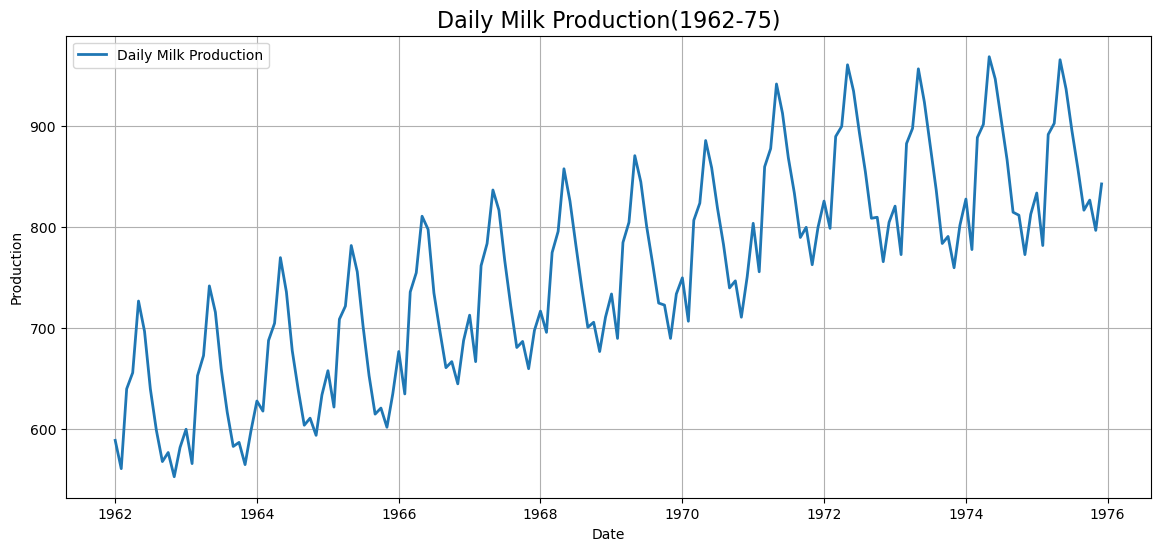

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df['Production'], label='Daily Milk Production', linewidth=2)
plt.title('Daily Milk Production(1962-75)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df = df[['Production']]
# feature scaling => normalization
# translates the feature 'Production' in range 0 and 1 
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df.shape

(168, 1)

In [11]:
x = []
y = []
n_steps = 12
# because we want to forecast for next 12 months
for i in range(n_steps, len(scaled_df)):
    x.append(scaled_df[i-n_steps:i, 0])
    y.append(scaled_df[i, 0])

x, y = np.array(x), np.array(y)

x.shape, y.shape

((156, 12), (156,))

In [12]:
# Resample to monthly frequency and calculate the mean
yearly_avg = df['Production'].resample('YE').mean()
yearly_avg

Date
1962-12-31    615.750000
1963-12-31    630.000000
1964-12-31    658.750000
1965-12-31    673.083333
1966-12-31    708.750000
1967-12-31    732.916667
1968-12-31    748.833333
1969-12-31    763.916667
1970-12-31    782.000000
1971-12-31    834.083333
1972-12-31    854.166667
1973-12-31    842.583333
1974-12-31    858.416667
1975-12-31    862.666667
Freq: YE-DEC, Name: Production, dtype: float64

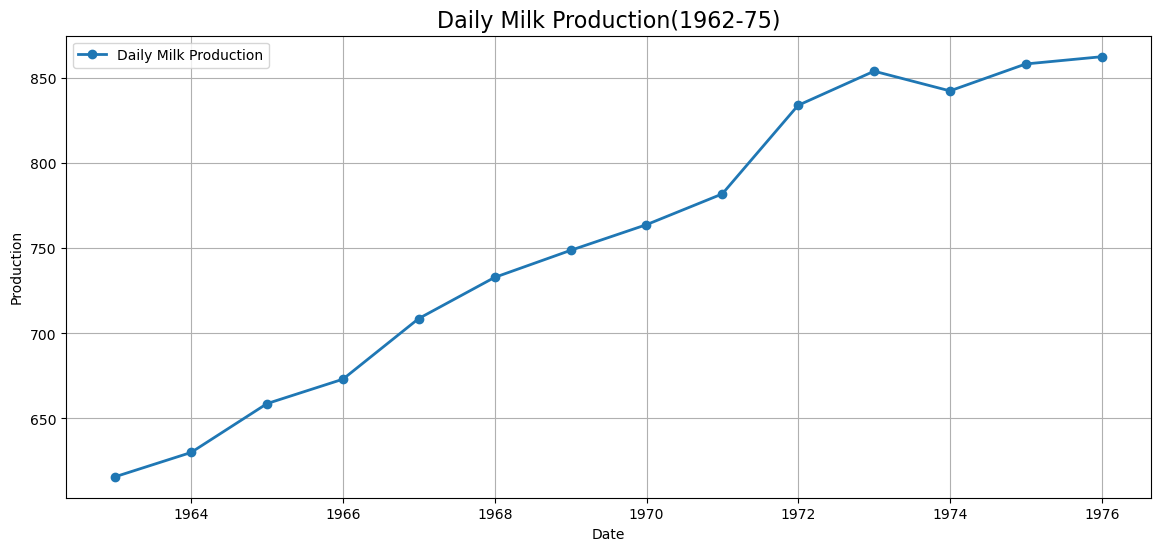

In [13]:

plt.figure(figsize=(14,6))
plt.plot(yearly_avg, marker='o', linestyle='-', label='Daily Milk Production', linewidth=2)
plt.title('Daily Milk Production(1962-75)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(x.shape[1], 1))) # input layer
model.add(Dense(1))  # output layer

C:\Users\YOGITA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam', loss='mse')  # confiugure the model

In [16]:
# Train Model
history = model.fit(x, y, epochs=30, batch_size=32, validation_split=0.2, verbose=1)  # fit the model

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 425ms/step - loss: 0.1469 - val_loss: 0.0198
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0483 - val_loss: 0.0229
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0332 - val_loss: 0.0188
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0131 - val_loss: 0.0613
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0209 - val_loss: 0.0436
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0115 - val_loss: 0.0117
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0095 - val_loss: 0.0060
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0098 - val_loss: 0.0071
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0062 - val_loss: 0.0146
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0063 - val_loss: 0.0173
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0058 - val_loss: 0.0093
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0042 - val_loss: 0.0056

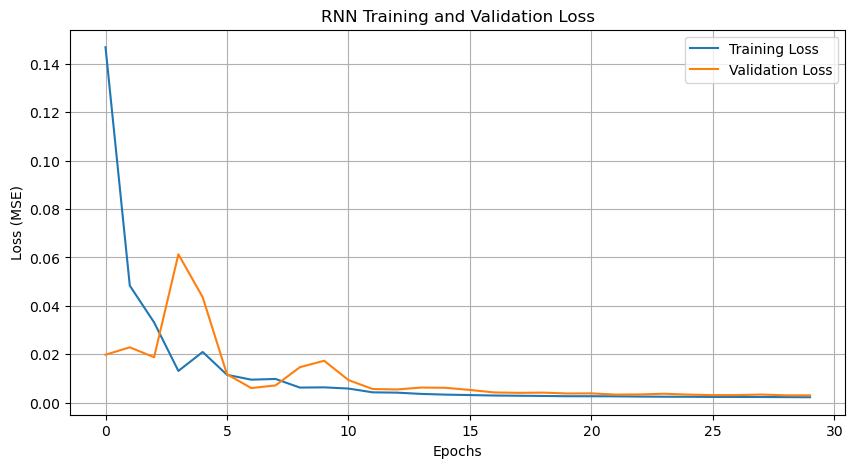

In [17]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

The loss oscillated upto the first 5 epochs and after that it is constant.

In [19]:
# Example: Predict next year's consumption
last_12_months = scaled_df[-12:]
last_12_months

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [20]:
last_12_months = last_12_months.reshape((1, n_steps, 1))
last_12_months

array([[[0.67548077],
        [0.55048077],
        [0.81490385],
        [0.84134615],
        [0.99278846],
        [0.92307692],
        [0.82451923],
        [0.73317308],
        [0.63461538],
        [0.65865385],
        [0.58653846],
        [0.69711538]]])

In [21]:
last_12_months.shape

(1, 12, 1)

In [22]:
scaled_prediction = model.predict(last_12_months)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


In [23]:
scaled_prediction.shape

(1, 1)

In [24]:
predicted_production = scaler.inverse_transform(scaled_prediction)
print(f"Predicted next month's consumption: {predicted_production[0][0]:.2f}")

Predicted next month's consumption: 824.23


In [25]:
# forecasting for the next 12 months
forecast = []                       
input_seq = last_12_months
for _ in range(12):
    pred1 = model.predict(input_seq)
    next_month = scaler.inverse_transform(pred1)
    forecast.append(next_month[0][0])
    pred1 = pred1.reshape(1, 1, 1)
    input_seq = np.append(input_seq[:, 1:, :], pred1, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


# LSTM

In [27]:
from tensorflow.keras.layers import LSTM

In [28]:
# Train-Test Split
x = x.reshape(x.shape[0], x.shape[1],1)
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [29]:
look_back = 12

model = Sequential([
    LSTM(50,input_shape=(look_back,1), return_sequences=False,),
    Dense(1)    
])

x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

C:\Users\YOGITA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


((156, 12, 1), (124, 12, 1), (32, 12, 1), (124,), (32,))

In [30]:
model.compile(optimizer='adam',loss='mse')

In [31]:
x_train.shape, y_train.shape

((124, 12, 1), (124,))

In [32]:
model.fit(x_train, y_train, epochs=50, batch_size=50, validation_split=0.1) # fit the model with 50epochs and batch size 50 

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 403ms/step - loss: 0.2083 - val_loss: 0.3930
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1421 - val_loss: 0.2554
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0905 - val_loss: 0.1439
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0514 - val_loss: 0.0632
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0291 - val_loss: 0.0271
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0270 - val_loss: 0.0327
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0353 - val_loss: 0.0348
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0342 - val_loss: 0.0273
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0279 - val_loss: 0.0272
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.0245 - val_loss: 0.0346
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0250 - val_loss: 0.0424
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0264 - val_loss: 0

In [33]:
pred_norm = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


In [34]:
pred = scaler.inverse_transform(pred_norm.reshape(-1,1))
y_true = scaler.inverse_transform(y_test.reshape(-1,1))

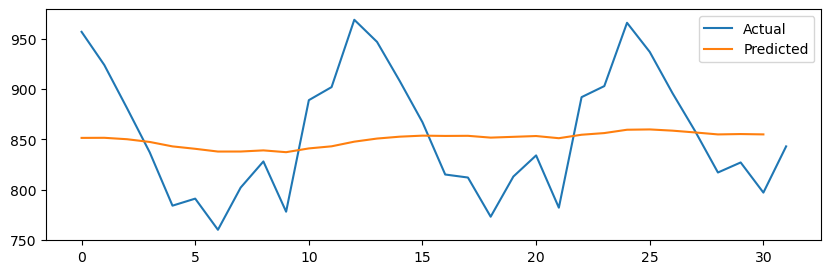

In [35]:
plt.figure(figsize=(10,3))
plt.plot(y_true, label='Actual')
plt.plot(pred[1:], label='Predicted')
plt.legend()
plt.show()

In [36]:
type(x)

numpy.ndarray

In [37]:
future_periods = 12
future_predictions = []
current_rec = scaled_df[-look_back:]

for i in range(future_periods):
    x = current_rec.reshape(1,look_back,1)
    pred = model.predict(x)
    future_predictions.append(pred[0,0])
    #print(f'X: {x} -> y:{pred[0,0]}')        
    current_rec = np.append(current_rec[1:],pred )    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


In [38]:
actual_preds = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))
actual_preds

array([[857.66486],
       [859.81   ],
       [865.05383],
       [863.4963 ],
       [860.88043],
       [853.91547],
       [848.2636 ],
       [844.94476],
       [843.95886],
       [845.6392 ],
       [846.86304],
       [850.1007 ]], dtype=float32)

These are next 12 months forecasting production.

As per the forecasting for the next 12 months the dairy business is making good in next 12 months and may be need some more resurces to handle the business.